In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
#import seaborn as sns; sns.set()

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

#this will mute errors that make your final pdf less legible
import warnings
warnings.filterwarnings('ignore')

In [22]:
# load the data
# df = pd.read_excel('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/PovertyStatusPast12Months.xlsx')
df = pd.read_csv('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/income_range_2021.csv')
df

,Label (Grouping),"Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Margin of Error","Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Margin of Error","Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Margin of Error","Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Margin of Error"
0,Total,"1,920,160","±7,378","1,194,014","±13,096","903,811","±13,233","726,146","±13,019"
1,"Less than $10,000",5.0%,±0.3,2.7%,±0.3,1.1%,±0.2,9.4%,±0.6
2,"$10,000 to $14,999",3.5%,±0.2,1.8%,±0.2,0.9%,±0.2,6.7%,±0.5
3,"$15,000 to $24,999",5.3%,±0.3,3.2%,±0.3,1.7%,±0.3,9.1%,±0.6
4,"$25,000 to $34,999",4.9%,±0.3,3.7%,±0.3,2.1%,±0.3,7.3%,±0.5
5,"$35,000 to $49,999",7.4%,±0.3,6.1%,±0.4,4.4%,±0.4,10.0%,±0.5
6,"$50,000 to $74,999",12.4%,±0.4,10.6%,±0.5,9.1%,±0.6,15.8%,±0.8
7,"$75,000 to $99,999",11.1%,±0.4,10.8%,±0.5,10.2%,±0.5,11.8%,±0.7
8,"$100,000 to $149,999",18.1%,±0.5,19.9%,±0.7,20.7%,±0.7,14.7%,±0.8
9,"$150,000 to $199,999",11.9%,±0.4,14.5%,±0.5,16.9%,±0.7,6.9%,±0.5


In [25]:
# df = df.drop(['Margin of Error', 'Margin of Error.1', 'Margin of Error.2', 'Estimate.2'], axis=1)
df = df[df.columns.drop(list(df.filter(regex='Margin of Error')))]

In [26]:
df

,Label (Grouping),"Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Estimate","Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Estimate"
0,Total,"1,920,160","1,194,014","903,811","726,146"
1,"Less than $10,000",5.0%,2.7%,1.1%,9.4%
2,"$10,000 to $14,999",3.5%,1.8%,0.9%,6.7%
3,"$15,000 to $24,999",5.3%,3.2%,1.7%,9.1%
4,"$25,000 to $34,999",4.9%,3.7%,2.1%,7.3%
5,"$35,000 to $49,999",7.4%,6.1%,4.4%,10.0%
6,"$50,000 to $74,999",12.4%,10.6%,9.1%,15.8%
7,"$75,000 to $99,999",11.1%,10.8%,10.2%,11.8%
8,"$100,000 to $149,999",18.1%,19.9%,20.7%,14.7%
9,"$150,000 to $199,999",11.9%,14.5%,16.9%,6.9%


In [18]:
df.rename(columns= {'Estimate': 'Total number of people', 'Estimate.1': 'Number of people below poverty line'}, inplace=True)
df

,Label,Total number of people,Number of people below poverty line
0,Population for whom poverty status is determined,"4,741,662","441,663"
1,AGE,NaN,NaN
2,Under 18 years,"940,401","100,583"
3,Under 5 years,"241,926","27,334"
4,5 to 17 years,"698,475","73,249"
...,...,...,...
64,Mean income deficit for unrelated individuals ...,"8,140",(X)
65,"Worked full-time, year-round in the past 12 mo...","512,893","8,975"
66,"Worked less than full-time, year-round in the ...","238,589","63,369"
67,Did not work,"323,567","136,810"


In [30]:
df1 = df.copy()

In [32]:
df1.isna().sum()
# df1

Label (Grouping)                                                                0
Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Estimate                 1
Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Estimate                   1
Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Estimate    1
Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Estimate       1
dtype: int64

In [45]:
df1.rename(columns={'Boston-Cambridge-Newton, MA-NH Metro Area!!Households!!Estimate': 'Household', 'Boston-Cambridge-Newton, MA-NH Metro Area!!Families!!Estimate': 'Families',  'Boston-Cambridge-Newton, MA-NH Metro Area!!Married-couple families!!Estimate' : 'Married Couple Families', 'Boston-Cambridge-Newton, MA-NH Metro Area!!Nonfamily households!!Estimate': 'Non Family Households', 'Label (Grouping)': 'Category'}, inplace=True)

In [51]:
df2 = df1[:11]

In [52]:
df2

,Category,Household,Families,Married Couple Families,Non Family Households
0,Total,"1,920,160","1,194,014","903,811","726,146"
1,"Less than $10,000",5.0%,2.7%,1.1%,9.4%
2,"$10,000 to $14,999",3.5%,1.8%,0.9%,6.7%
3,"$15,000 to $24,999",5.3%,3.2%,1.7%,9.1%
4,"$25,000 to $34,999",4.9%,3.7%,2.1%,7.3%
5,"$35,000 to $49,999",7.4%,6.1%,4.4%,10.0%
6,"$50,000 to $74,999",12.4%,10.6%,9.1%,15.8%
7,"$75,000 to $99,999",11.1%,10.8%,10.2%,11.8%
8,"$100,000 to $149,999",18.1%,19.9%,20.7%,14.7%
9,"$150,000 to $199,999",11.9%,14.5%,16.9%,6.9%


In [77]:
df2 = df1[1:11]
df2['Household'] = (df2['Household']).str.replace('%', '')
df2['Household'] = df2['Household'].astype(float)
df2['Families'] = (df2['Families']).str.replace('%', '')
df2['Families'] = df2['Families'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Category                 10 non-null     object 
 1   Household                10 non-null     float64
 2   Families                 10 non-null     float64
 3   Married Couple Families  10 non-null     object 
 4   Non Family Households    10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


<BarContainer object of 3 artists>

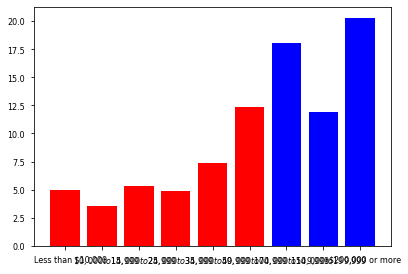

In [84]:
df4 = df2[0:6]
df5= df2[7:11]

plt.bar(df4['Category'], df4['Household'], color="red")
plt.bar(df5['Category'], df5['Household'], color="blue")

<AxesSubplot:xlabel='Category', ylabel='Household'>

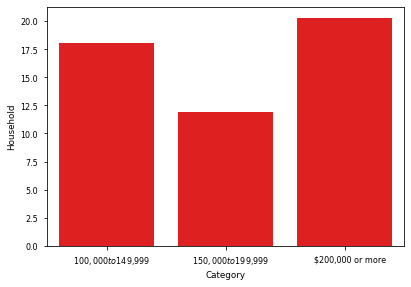

In [82]:
import seaborn as sns

sns.barplot(data=df2[0:6], x="Category", y="Household", color="blue")
sns.barplot(data=df2[7:11], x="Category", y="Household", color="red")